In [6]:
import matplotlib.pyplot as plt

In [7]:
timings = {
    "BS Euro": {
        "price_aad":   {1: 183556, 2: 117475, 4: 79125, 8: 68755},
        "finite_diff": {1:  59972, 2:  35004, 4: 21859, 8: 18392},
    },
    "Heston Euro": {
        "price_aad":   {1: 230097, 2: 130361, 4: 83688, 8: 58479},
        "finite_diff": {1:  74915, 2:  39265, 4: 23525, 8: 17855},
    },
    "BS Asian": {
        "price_aad":   {1: 188076, 2: 116666, 4: 82284, 8: 66675},
        "finite_diff": {1:  58588, 2:  35440, 4: 24955, 8: 21982},
    },
}

In [8]:
def speedup_series(times: dict) -> tuple[list[int], list[float]]:
    """Return (threads, speedup) from a dict like {threads: time_ms}."""
    threads = sorted(times)
    t1 = float(times[1])
    spd = [t1 / times[p] for p in threads]
    return threads, spd

def efficiency_from_speedup(threads: list[int], spd: list[float]) -> list[float]:
    return [s / p for s, p in zip(spd, threads)]

def slug(s: str) -> str:
    return s.lower().replace(" ", "_")

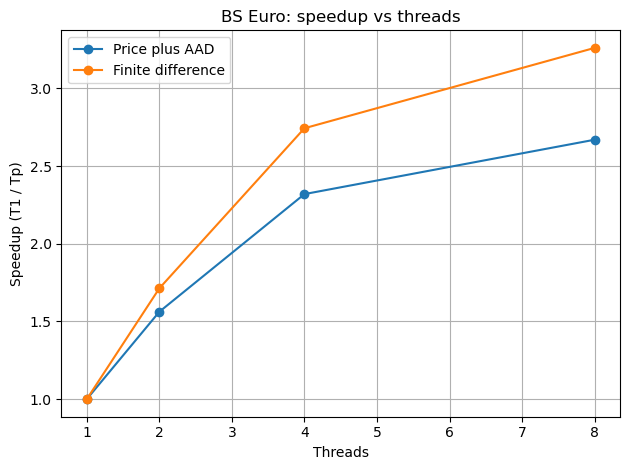

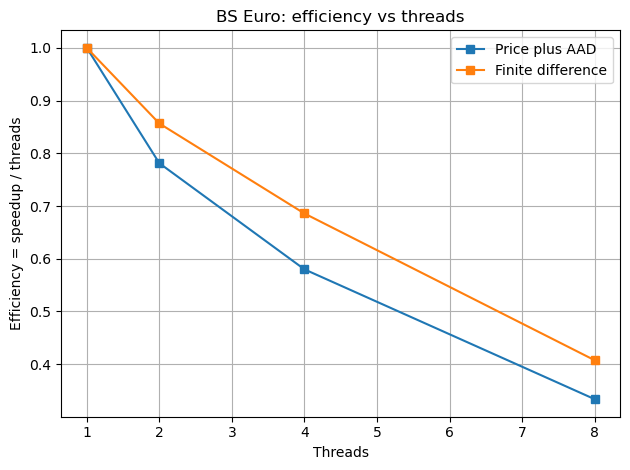

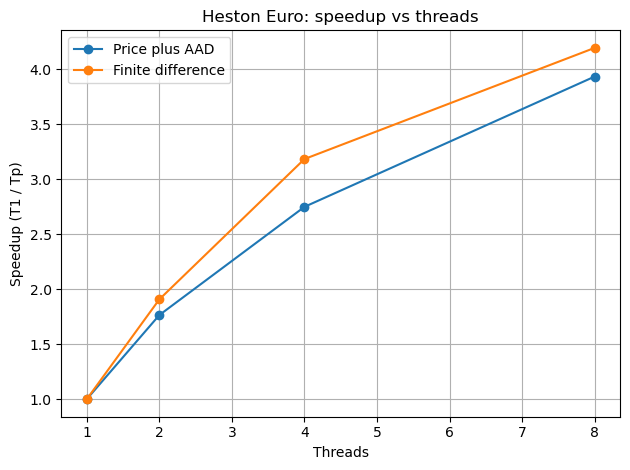

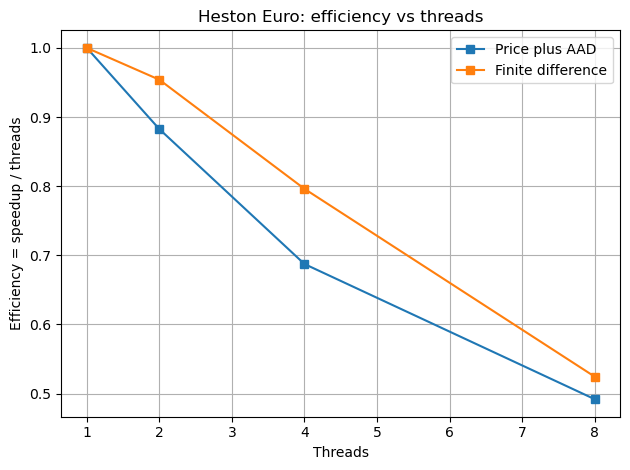

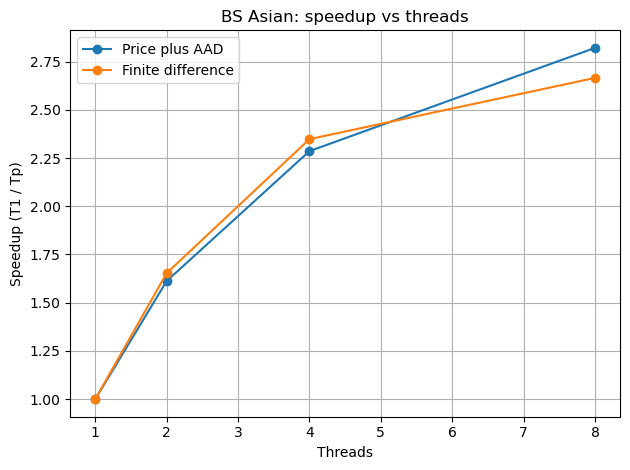

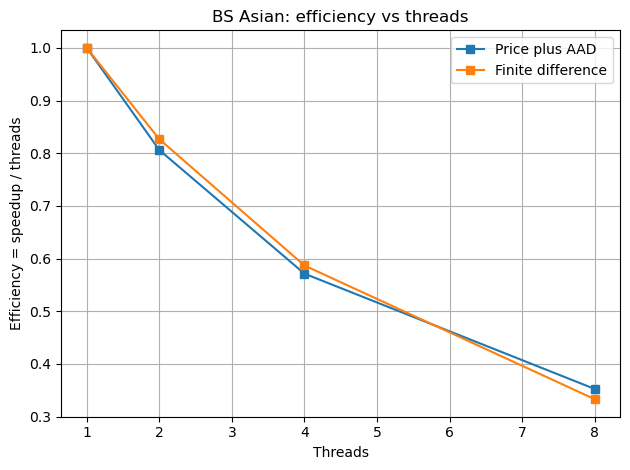

In [9]:
for case, passes in timings.items():
    # --- Speedup plot ---
    plt.figure()
    for label, times in passes.items():
        th, spd = speedup_series(times)
        plt.plot(th, spd, marker="o", label=("Price plus AAD" if label=="price_aad" else "Finite difference"))
    plt.title(f"{case}: speedup vs threads")
    plt.xlabel("Threads")
    plt.ylabel("Speedup (T1 / Tp)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"speedup_{slug(case)}.png", dpi=200)
    
    plt.figure()
    for label, times in passes.items():
        th, spd = speedup_series(times)
        eff = efficiency_from_speedup(th, spd)
        plt.plot(th, eff, marker="s", label=("Price plus AAD" if label=="price_aad" else "Finite difference"))
    plt.title(f"{case}: efficiency vs threads")
    plt.xlabel("Threads")
    plt.ylabel("Efficiency = speedup / threads")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"efficiency_{slug(case)}.png", dpi=200)
